## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('J:/Data science/ML/Pyhon for ML/3.1 UNZIP_ME_FOR_NOTEBOOKS_V4/DATA/penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
print(df['species'].unique())
print(df['island'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


In [5]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [9]:
df.shape

(334, 7)

In [10]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df = df[df['sex'] != '.']

In [12]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

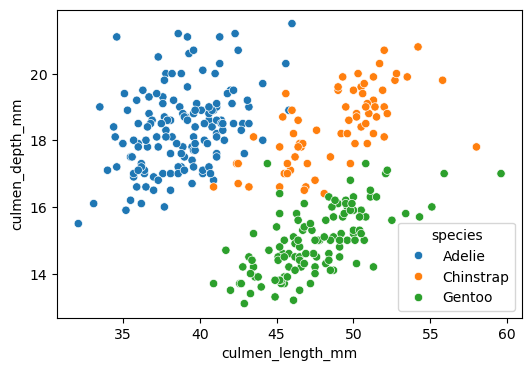

In [127]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='culmen_length_mm',y='culmen_depth_mm',hue='species')

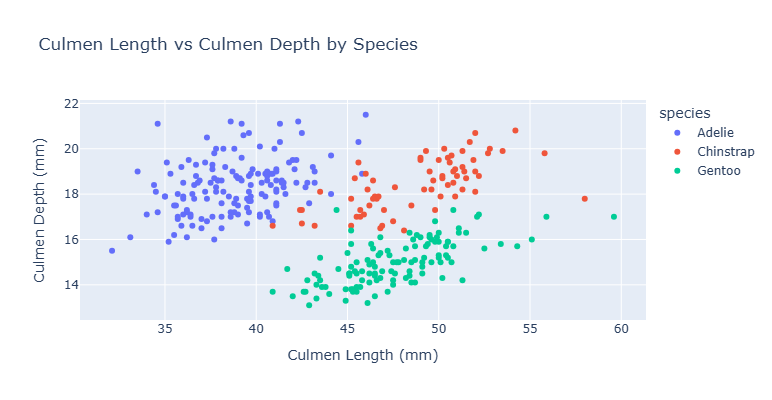

In [128]:
fig = px.scatter(
    df,
    x='culmen_length_mm',  # X-axis
    y='culmen_depth_mm',   # Y-axis
    color='species',       # Color by species
    title='Culmen Length vs Culmen Depth by Species',
    labels={
        'culmen_length_mm': 'Culmen Length (mm)',
        'culmen_depth_mm': 'Culmen Depth (mm)'
    }
)

# Update layout for better readability
fig.update_layout(
    width=600,  # Set width of the figure
    height=400  # Set height of the figure
)

# Show the plot
fig.show()

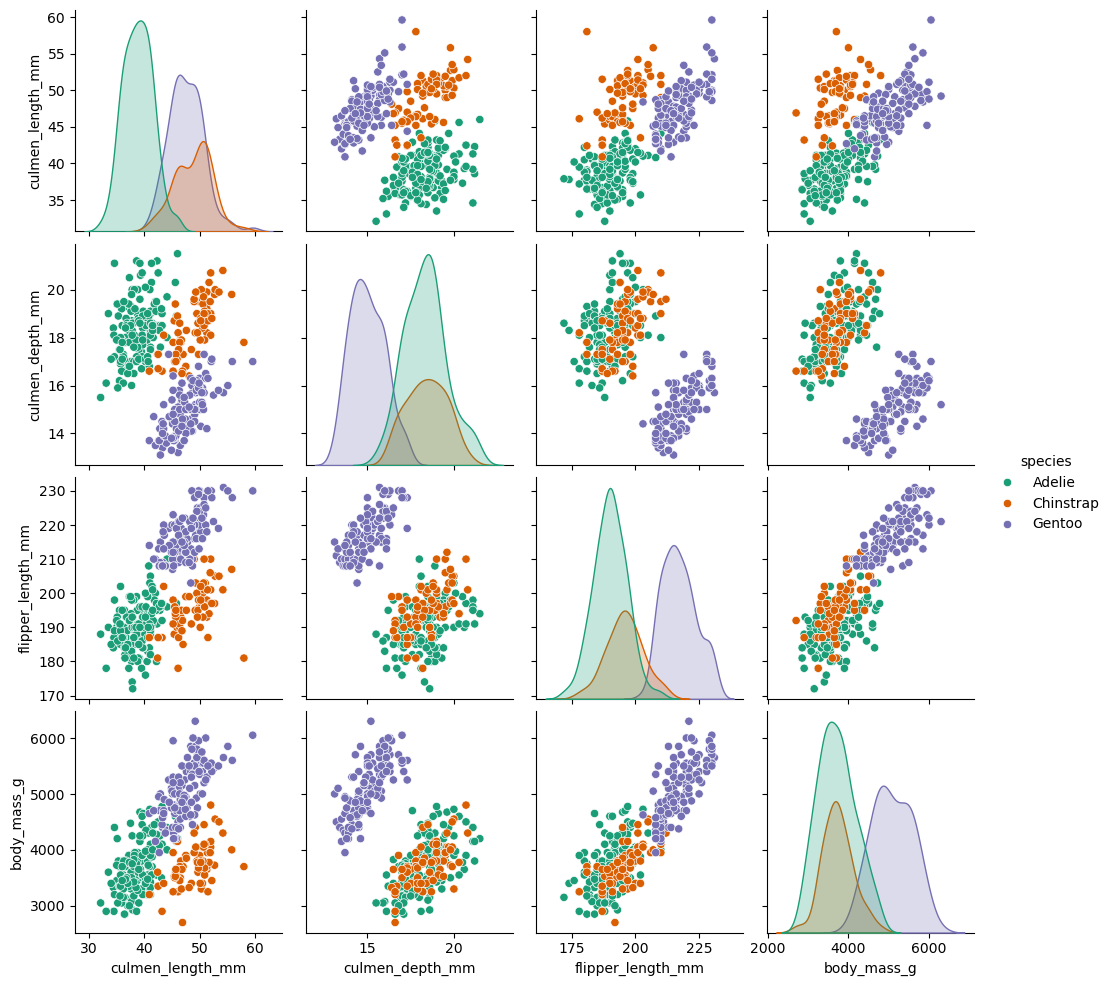

In [130]:
sns.pairplot(df,hue='species',palette='Dark2')

C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_17052\1926922542.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




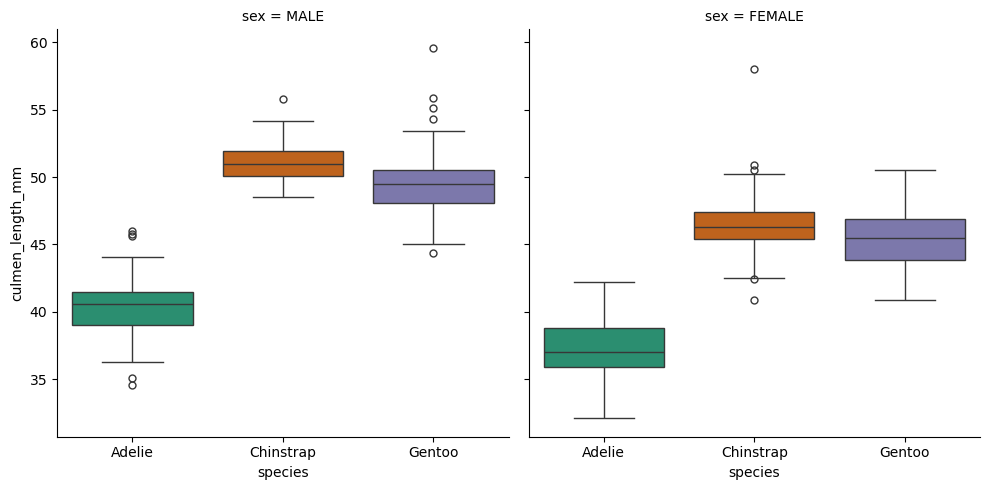

In [131]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

In [14]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,True,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,True,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,True,True,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,True,False,False,True,False


In [15]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [17]:
pd.get_dummies(df.drop('species',axis=1) , drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


In [18]:
x = pd.get_dummies(df.drop('species',axis=1) , drop_first=True)
y = df['species']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model = DecisionTreeClassifier()

In [23]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [32]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[38,  2,  0],
       [ 1, 26,  0],
       [ 1,  0, 32]], dtype=int64)

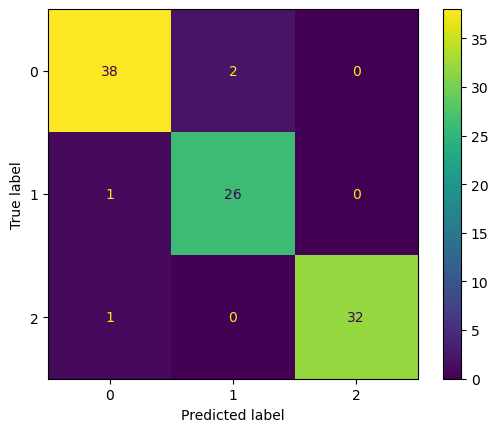

In [46]:
plt_conf = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
plt_conf.plot()
plt.show()

In [48]:
model.feature_importances_

array([0.33350103, 0.02010577, 0.57575804, 0.        , 0.04491847,
       0.        , 0.02571668])

In [60]:
feature_importances = pd.DataFrame(data=model.feature_importances_,index=x.columns , columns=['feature_importances'])
feature_importances

,feature_importances
culmen_length_mm,0.333501
culmen_depth_mm,0.020106
flipper_length_mm,0.575758
body_mass_g,0.000000
island_Dream,0.044918
island_Torgersen,0.000000
sex_MALE,0.025717


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'culmen_length_mm'),
  Text(1, 0, 'culmen_depth_mm'),
  Text(2, 0, 'flipper_length_mm'),
  Text(3, 0, 'body_mass_g'),
  Text(4, 0, 'island_Dream'),
  Text(5, 0, 'island_Torgersen'),
  Text(6, 0, 'sex_MALE')])

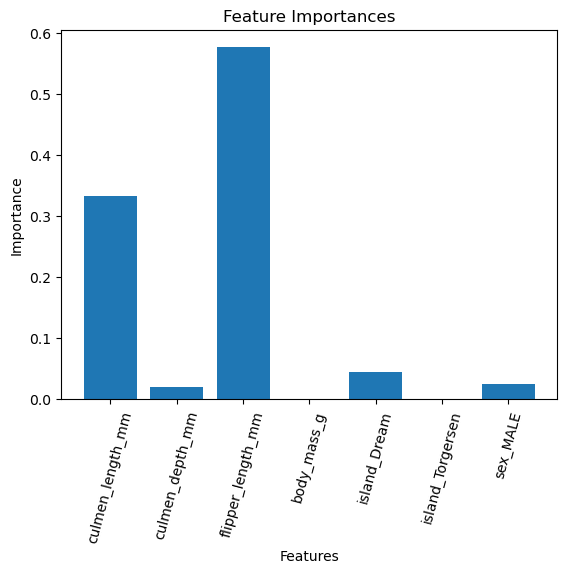

In [68]:
plt.bar(feature_importances.index, feature_importances['feature_importances'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

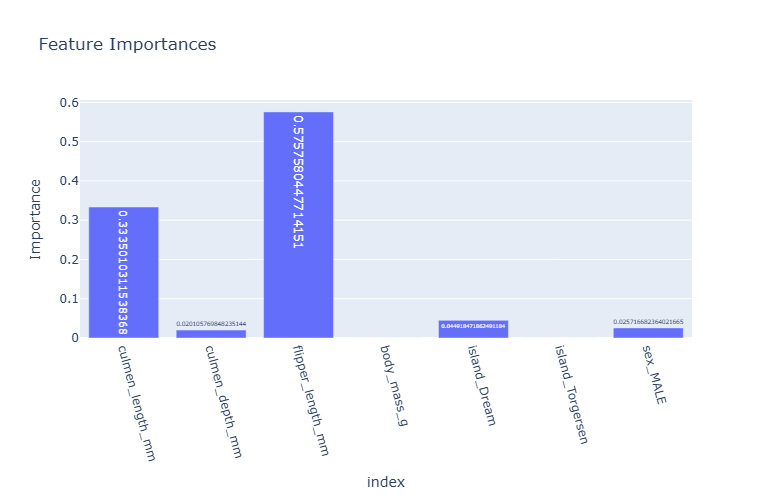

In [73]:
# Create the bar plot
fig = px.bar(
    feature_importances,
    x=feature_importances.index,
    y='feature_importances',
    labels={'feature_importances': 'Importance', 'Feature': 'Features'},
    title='Feature Importances',
    text='feature_importances'  # Add values on top of bars
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=75)

# Control figure size
fig.update_layout(
    width=800,  # Set the width of the figure
    height=500  # Set the height of the figure
)

# Show the plot
fig.show()

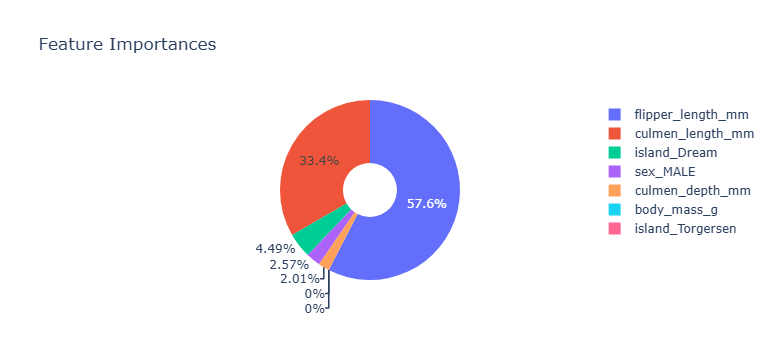

In [71]:
# Create the pie chart
fig = px.pie(
    feature_importances,
    names=feature_importances.index,
    values='feature_importances',
    title='Feature Importances',
    hole=0.3  # Optional: Creates a donut chart
)

# Show the plot
fig.show()

In [74]:
from sklearn.tree import plot_tree

[Text(0.5416666666666666, 0.9, 'x[2] <= 206.0\ngini = 0.626\nsamples = 233\nvalue = [106, 41, 86]'),
 Text(0.3333333333333333, 0.7, 'x[0] <= 43.35\ngini = 0.4\nsamples = 145\nvalue = [105, 40, 0]'),
 Text(0.4375, 0.8, 'True  '),
 Text(0.16666666666666666, 0.5, 'x[0] <= 42.35\ngini = 0.056\nsamples = 105\nvalue = [102, 3, 0]'),
 Text(0.08333333333333333, 0.3, 'gini = 0.0\nsamples = 97\nvalue = [97, 0, 0]'),
 Text(0.25, 0.3, 'x[6] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.5, 0.5, 'x[4] <= 0.5\ngini = 0.139\nsamples = 40\nvalue = [3, 37, 0]'),
 Text(0.4166666666666667, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.5833333333333334, 0.3, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.75, 0.7, 'x[1] <= 17.65\ngini = 0.045\nsamples = 88\nvalue = [1, 1, 86]'),
 Text(0.6458333333333333, 0.8, ' 

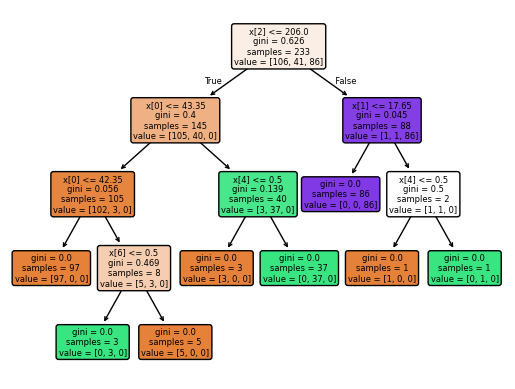

In [90]:
#plt.figure()
plot_tree(model,fontsize=6,filled=True,rounded=True)

In [116]:
def repot_model(mymodel):
    model_pred = model.predict(x_test)
    print(classification_report(y_test,model_pred))
    print('\n')
    plot_tree(mymodel,filled=True,feature_names=x.columns,fontsize=6)

In [117]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100





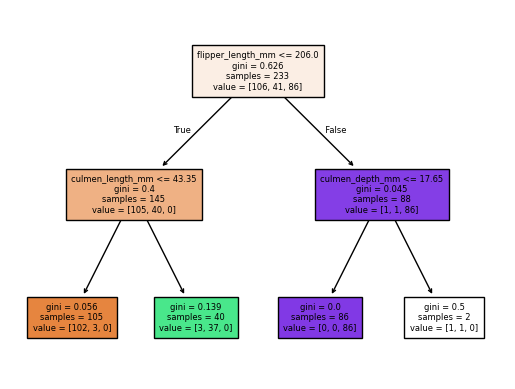

In [118]:
repot_model(pruned_tree)

In [119]:
model_leaf = DecisionTreeClassifier(max_leaf_nodes=3)
model_leaf.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100





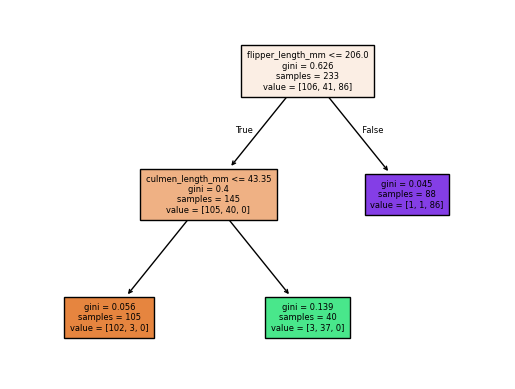

In [120]:
repot_model(model_leaf)

In [121]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100





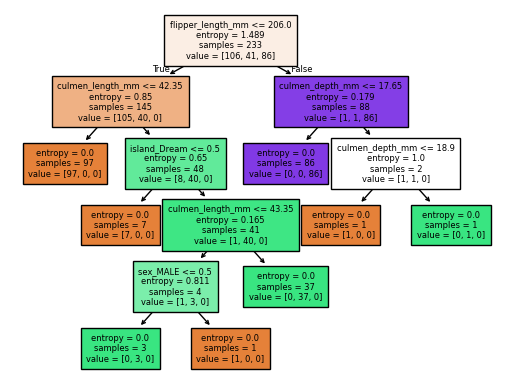

In [122]:
repot_model(entropy_tree)